In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')
submission=pd.read_csv('../input/sampleSubmission.csv')

In [4]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [5]:
test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [6]:
dtype_df=train.dtypes.reset_index()
dtype_df.columns=['count','columns types']
dtype_df.groupby('columns types').aggregate('count').reset_index()

,columns types,count
0,int64,94
1,object,1


In [7]:
missing_df=train.isnull().sum(axis=0).reset_index()
missing_df.columns=['column_name','missing_count']
missing_df=missing_df.loc[missing_df['missing_count']>0]
missing_df=missing_df.sort_values(by='missing_count',ascending=False)
missing_df.head()

,column_name,missing_count


In [8]:
train.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


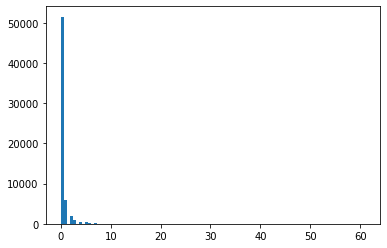

In [9]:
plt.hist(train['feat_1'],bins=100)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['target']=le.fit_transform(train['target'])+1

In [11]:
train['target'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [12]:
train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [13]:
submission.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0


In [14]:
print(train.shape)
print(test.shape)

(61878, 95)
(144368, 94)


In [15]:
train=train.drop(['id'],axis=1)

In [16]:
test=test.drop(['id'],axis=1)

In [17]:
print(train.shape)
print(test.shape)

(61878, 94)
(144368, 93)


In [18]:
target=train['target']
train=train.drop(['target'],axis=1)

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
NFOLD=3
kfold=StratifiedKFold(n_splits=NFOLD,shuffle=True,random_state=123)

y_preds=0
y_oof=np.zeros(train.shape[0])
cv_score=0

for fold,(tr_idx,val_idx) in enumerate(kfold.split(train,target)):
    X_train,X_val=train.iloc[tr_idx,:],train.iloc[val_idx,:]
    y_train,y_val=target.iloc[tr_idx],target.iloc[val_idx]
    
    clf=RandomForestClassifier()
    
    clf.fit(X_train,y_train)
    y_pred_val=clf.predict_proba(X_val)
    print('Fold:',fold,' logloss:{}'.format(log_loss(y_val,y_pred_val)))
    cv_score+=log_loss(y_val,y_pred_val)/NFOLD
    y_preds+=clf.predict_proba(test)/NFOLD
    

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fold: 0  logloss:1.57067735289927


C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fold: 1  logloss:1.6033536593010442


C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fold: 2  logloss:1.5486123294454377


In [30]:
submission

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0
5,6,1,0,0,0,0,0,0,0,0
6,7,1,0,0,0,0,0,0,0,0
7,8,1,0,0,0,0,0,0,0,0
8,9,1,0,0,0,0,0,0,0,0
9,10,1,0,0,0,0,0,0,0,0
